# 💙 UTS Sistem Temu Kembali Informasi  
### A11.2023.14976 — Ghaitsa Qiyala Shafiya  

## Soal 02 — Document Preprocessing (20%)  

### 🎯 Tujuan  
Menerapkan tahapan **Document Preprocessing** pada korpus mini (5–15 dokumen) untuk Sistem Temu Kembali Informasi (STKI).  
Tahapan meliputi:  
- Case Folding  
- Normalisasi angka & tanda baca  
- Tokenisasi  
- Stopword Removal  
- Stemming  

### 📖 Penjelasan Singkat  
Preprocessing adalah tahap penting dalam *Information Retrieval (IR)* untuk menyiapkan teks mentah sebelum diolah ke tahap indexing.  
Dengan preprocessing, sistem bisa lebih akurat dalam mengenali kesamaan antar kata, misalnya “berlari”, “pelari”, dan “lari-lari” semuanya menjadi **“lari”**.

Data diambil dari folder `data/raw/`, dan hasil akhir disimpan di `data/processed/`.


In [1]:
# === Setup Path Otomatis Sesuai Struktur Folder Kamu ===
import os, pathlib
import nltk
import matplotlib.pyplot as plt

# Path notebook sekarang
NOTEBOOK_DIR = pathlib.Path().resolve()

# Folder proyek utama (1 level di atas notebooks/)
BASE_DIR = NOTEBOOK_DIR.parent

# Folder data
RAW_DIR = os.path.join(BASE_DIR, "data", "raw")
PROC_DIR = os.path.join(BASE_DIR, "data", "processed")
os.makedirs(PROC_DIR, exist_ok=True)

# Tampilkan hasil deteksi path
print("\033[96m" + "="*80)
print("📂 Folder Path Aktif")
print("="*80 + "\033[0m")
print("NOTEBOOK_DIR:", NOTEBOOK_DIR)
print("BASE_DIR    :", BASE_DIR)
print("RAW_DIR     :", RAW_DIR)
print("PROC_DIR    :", PROC_DIR)

# Tampilkan file di data/raw
print("\n\033[96m📑 Daftar file di data/raw/:\033[0m")
if os.path.exists(RAW_DIR):
    for f in os.listdir(RAW_DIR):
        if f.endswith(".txt"):
            print("💠", f)
else:
    print("⚠️ Folder data/raw tidak ditemukan.")


📂 Folder Path Aktif
NOTEBOOK_DIR: D:\SMSTR 5\SISTEM TEMU KEMBALI INFORMASI\UTS-STKI\stki-uts-a11.2023.14976-ghaitsa\notebooks
BASE_DIR    : D:\SMSTR 5\SISTEM TEMU KEMBALI INFORMASI\UTS-STKI\stki-uts-a11.2023.14976-ghaitsa
RAW_DIR     : D:\SMSTR 5\SISTEM TEMU KEMBALI INFORMASI\UTS-STKI\stki-uts-a11.2023.14976-ghaitsa\data\raw
PROC_DIR    : D:\SMSTR 5\SISTEM TEMU KEMBALI INFORMASI\UTS-STKI\stki-uts-a11.2023.14976-ghaitsa\data\processed

📑 Daftar file di data/raw/:
💠 bisnis.txt
💠 ekonomi.txt
💠 film.txt
💠 kesehatan.txt
💠 kesejahteraan.txt
💠 kuliner.txt
💠 lingkungan.txt
💠 musik.txt
💠 olahraga.txt
💠 pariwisata.txt
💠 pendidikan.txt
💠 pendidikan_tinggi.txt
💠 pertanian.txt
💠 politik.txt
💠 sains.txt
💠 sosial_media.txt
💠 teknologi.txt
💠 teknologi_dan_etika.txt
💠 teknologi_informasi.txt
💠 transportasi.txt


In [2]:
# === 🧹 Fungsi Preprocessing Lengkap ===
import re
import nltk
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Unduh resource NLTK
nltk.download('punkt')
nltk.download('stopwords')

# Inisialisasi Stemmer Bahasa Indonesia (Sastrawi)
try:
    from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    _HAS_SASTRAWI = True
except:
    _HAS_SASTRAWI = False
    print("⚠️ Library Sastrawi tidak ditemukan, stemming dilewati.")

# Daftar stopwords Bahasa Indonesia
STOP_WORDS = set(stopwords.words('indonesian'))

# === Tahapan Preprocessing ===
def clean(text):
    """
    Case Folding + Normalisasi Angka & Tanda Baca.
    Angka diganti <num>, tanda baca dihapus.
    """
    text = text.lower()
    text = re.sub(r"\d+", " <num> ", text)
    text = re.sub(r"[^\w\s<>-]", " ", text)
    text = re.sub(r"\s+", " ", text).strip()
    return text

def tokenize(text):
    """Memecah teks menjadi token-token kata."""
    return word_tokenize(text)

def remove_stopwords(tokens):
    """Menghapus kata-kata umum yang tidak bermakna (stopwords)."""
    return [t for t in tokens if t not in STOP_WORDS and t.strip() != ""]

def stem(tokens):
    """Melakukan stemming (pengembalian ke kata dasar)."""
    if _HAS_SASTRAWI:
        return [stemmer.stem(t) for t in tokens]
    else:
        return tokens

def preprocess_pipeline(text):
    """Pipeline preprocessing lengkap dari teks mentah ke token akhir."""
    t = clean(text)
    toks = tokenize(t)
    toks = remove_stopwords(toks)
    toks = stem(toks)
    return toks

# === Fungsi Tampilan Hasil (dengan warna & garis) ===
def show_before_after(fname, raw_text, tokens):
    """Menampilkan hasil sebelum & sesudah preprocessing."""
    print("\033[94m" + "="*80)
    print(f"📄 Dokumen: {fname}")
    print("="*80 + "\033[0m")
    print("\033[96m>> Sebelum Preprocessing:\033[0m")
    print(raw_text[:400] + "...\n")
    print("\033[96m>> Sesudah Preprocessing (50 token pertama):\033[0m")
    print(" ".join(tokens[:50]) + " ...\n")

def show_top_tokens(fname, tokens):
    """Menampilkan 10 token paling sering muncul dalam dokumen."""
    freq = Counter(tokens)
    top10 = freq.most_common(10)
    print("\033[94m" + "-"*50)
    print(f"🔹 Top 10 Token pada {fname}")
    print("-"*50 + "\033[0m")
    for w, c in top10:
        print(f"{w:15s} : {c}")
    print()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MMurt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MMurt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# === Contoh Uji Preprocessing pada 2 Dokumen Pertama ===
sample_files = [f for f in os.listdir(RAW_DIR) if f.endswith(".txt")][:2]

for fname in sample_files:
    path = os.path.join(RAW_DIR, fname)
    with open(path, "r", encoding="utf-8") as f:
        raw = f.read()
    tokens = preprocess_pipeline(raw)
    show_before_after(fname, raw, tokens)
    show_top_tokens(fname, tokens)


📄 Dokumen: bisnis.txt
>> Sebelum Preprocessing:
Strategi pemasaran digital kini menjadi kebutuhan utama bagi pelaku usaha. Analisis data pelanggan membantu meningkatkan penjualan produk....

>> Sesudah Preprocessing (50 token pertama):
strategi pasar digital butuh utama laku usaha analisis data langgan bantu tingkat jual produk ...

--------------------------------------------------
🔹 Top 10 Token pada bisnis.txt
--------------------------------------------------
strategi        : 1
pasar           : 1
digital         : 1
butuh           : 1
utama           : 1
laku            : 1
usaha           : 1
analisis        : 1
data            : 1
langgan         : 1

📄 Dokumen: ekonomi.txt
>> Sebelum Preprocessing:
Inflasi mempengaruhi harga kebutuhan pokok masyarakat. Pemerintah berupaya menjaga kestabilan ekonomi melalui kebijakan fiskal yang tepat....

>> Sesudah Preprocessing (50 token pertama):
inflasi pengaruh harga butuh pokok masyarakat perintah upaya jaga stabil ekonomi bijak fiskal 

In [4]:
# === Simpan hasil Preprocessing ke data/processed ===
for fname in os.listdir(RAW_DIR):
    if not fname.endswith(".txt"):
        continue
    with open(os.path.join(RAW_DIR, fname), "r", encoding="utf-8") as f:
        text = f.read()
    tokens = preprocess_pipeline(text)
    with open(os.path.join(PROC_DIR, fname), "w", encoding="utf-8") as fo:
        fo.write(" ".join(tokens))
    print(f"\033[96m[OK]\033[0m {fname} → {len(tokens)} tokens disimpan.")


[OK] bisnis.txt → 14 tokens disimpan.
[OK] ekonomi.txt → 13 tokens disimpan.
[OK] film.txt → 11 tokens disimpan.
[OK] kesehatan.txt → 13 tokens disimpan.
[OK] kesejahteraan.txt → 11 tokens disimpan.
[OK] kuliner.txt → 10 tokens disimpan.
[OK] lingkungan.txt → 13 tokens disimpan.
[OK] musik.txt → 10 tokens disimpan.
[OK] olahraga.txt → 11 tokens disimpan.
[OK] pariwisata.txt → 12 tokens disimpan.
[OK] pendidikan.txt → 13 tokens disimpan.
[OK] pendidikan_tinggi.txt → 13 tokens disimpan.
[OK] pertanian.txt → 13 tokens disimpan.
[OK] politik.txt → 12 tokens disimpan.
[OK] sains.txt → 10 tokens disimpan.
[OK] sosial_media.txt → 10 tokens disimpan.
[OK] teknologi.txt → 12 tokens disimpan.
[OK] teknologi_dan_etika.txt → 12 tokens disimpan.
[OK] teknologi_informasi.txt → 13 tokens disimpan.
[OK] transportasi.txt → 10 tokens disimpan.


In [5]:
# === Top 10 Token Paling Sering per Dokumen ===
for fname in os.listdir(PROC_DIR):
    if not fname.endswith(".txt"):
        continue
    with open(os.path.join(PROC_DIR, fname), "r", encoding="utf-8") as f:
        tokens = f.read().split()
    show_top_tokens(fname, tokens)


--------------------------------------------------
🔹 Top 10 Token pada bisnis.txt
--------------------------------------------------
strategi        : 1
pasar           : 1
digital         : 1
butuh           : 1
utama           : 1
laku            : 1
usaha           : 1
analisis        : 1
data            : 1
langgan         : 1

--------------------------------------------------
🔹 Top 10 Token pada ekonomi.txt
--------------------------------------------------
inflasi         : 1
pengaruh        : 1
harga           : 1
butuh           : 1
pokok           : 1
masyarakat      : 1
perintah        : 1
upaya           : 1
jaga            : 1
stabil          : 1

--------------------------------------------------
🔹 Top 10 Token pada film.txt
--------------------------------------------------
film            : 2
industri        : 1
indonesia       : 1
bangkit         : 1
genre           : 1
tarik           : 1
lokal           : 1
perhati         : 1
tonton          : 1
muda            : 1


C:\Users\MMurt\AppData\Local\Temp\ipykernel_28504\3509280635.py:17: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
d:\SMSTR 5\SISTEM TEMU KEMBALI INFORMASI\UTS-STKI\stki-uts-a11.2023.14976-ghaitsa\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


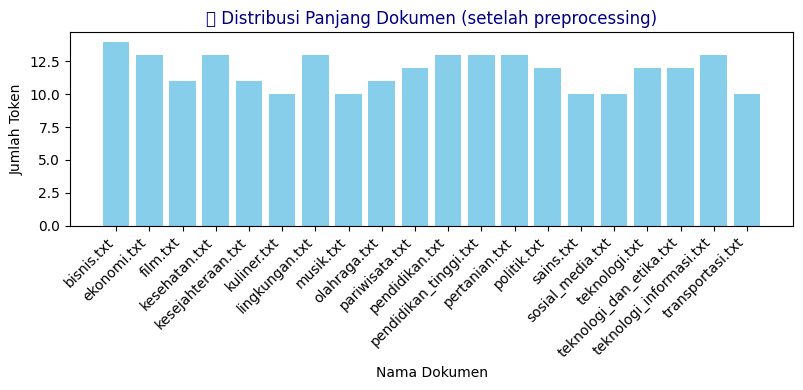

📏 Jumlah token per dokumen
bisnis.txt                : 14 token
ekonomi.txt               : 13 token
film.txt                  : 11 token
kesehatan.txt             : 13 token
kesejahteraan.txt         : 11 token
kuliner.txt               : 10 token
lingkungan.txt            : 13 token
musik.txt                 : 10 token
olahraga.txt              : 11 token
pariwisata.txt            : 12 token
pendidikan.txt            : 13 token
pendidikan_tinggi.txt     : 13 token
pertanian.txt             : 13 token
politik.txt               : 12 token
sains.txt                 : 10 token
sosial_media.txt          : 10 token
teknologi.txt             : 12 token
teknologi_dan_etika.txt   : 12 token
teknologi_informasi.txt   : 13 token
transportasi.txt          : 10 token


In [6]:
# === Grafik Distribusi Panjang Dokumen ===
doc_lengths = []

for fname in os.listdir(PROC_DIR):
    if not fname.endswith(".txt"):
        continue
    with open(os.path.join(PROC_DIR, fname), "r", encoding="utf-8") as f:
        tokens = f.read().split()
    doc_lengths.append((fname, len(tokens)))

plt.figure(figsize=(8,4))
plt.bar([x[0] for x in doc_lengths], [x[1] for x in doc_lengths], color="skyblue")
plt.xticks(rotation=45, ha="right")
plt.title("📊 Distribusi Panjang Dokumen (setelah preprocessing)", color="navy")
plt.xlabel("Nama Dokumen")
plt.ylabel("Jumlah Token")
plt.tight_layout()
plt.show()

print("\033[94m" + "="*80)
print("📏 Jumlah token per dokumen")
print("="*80 + "\033[0m")
for name, length in doc_lengths:
    print(f"{name:25s} : {length} token")
